# 1. 카메라 스티커앱 만들기 첫걸음

In [ ]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt
import numpy as np
import dlib  # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.1 사진준비

<function matplotlib.pyplot.show(*args, **kw)>

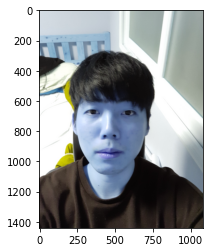

In [ ]:
my_image_path = ('/content/drive/MyDrive/exploration/pic/one.jpg')
img_bgr = cv2.imread(my_image_path,1) # OpenCV로 이미지를 불러옵니다,
img_show = img_bgr.copy()  # 출력용 이미지를 따로 보관합니다,
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show # 이미지를 출력해준다. (실제 출력)

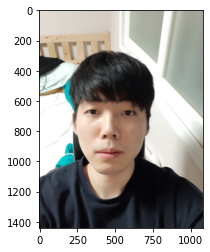

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

- 아래의 그래프는 SVM을 활용한 분류다. 1과 0으로 분류를 하게 되는 원리를 
나타낸 것이다. 이제 여기서 파란점이 얼굴이냐, 초록점이 얼굴이냐를 정하는것이 중요하다.
- 말 그대로 단순한 분류 knn을 활용하여 robust한 방법으로 분류는 가능하다. 하지만 각 벡터의 거리척도에 얼마만큼 적합한지 엔지니어가 일일이 가중치를 넣어야 되기 때문에 많은 시간이 걸린다. 
- 따라서 이번 노드에서는 dlib(딥러닝)을 활용한 효율적인 방법으로 분류하는 학습을 진행 할 것이다.

![2](https://raw.githubusercontent.com/fmfmsd/Chamchee/main/Exploration/Ex7/pic/2.png)

In [ ]:
# hog detector 선언 
import dlib
detector_hog = dlib.get_frontal_face_detector() #  bounding box(얼굴의 범위를 말하는 듯?)를 지정


# bounding box 추출 
dlib_rects = detector_hog(img_rgb, 1) # (image, num of img pyramid)

- 여기서 image pyramid란 이미지를 단계적으로 축소시키며 분석하는 작업을 말한다.
참고 사진을 보면 이해가 쉬움
---

![3](https://github.com/fmfmsd/Chamchee/blob/main/Exploration/Ex7/pic/3.png?raw=true)

rectangles[[(171, 542) (726, 1096)]]


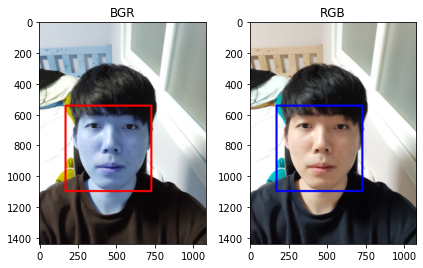

In [ ]:
print(dlib_rects) # 찾은 얼굴 영역 좌표 출력 [[(left, top) (right, bottom)]]


for dlib_rect in dlib_rects: 
    l = dlib_rect.left() # class detector_hog 안에 있는 메서드 호출
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (255,0,0), 12, lineType=cv2.LINE_AA) # cv2.rectangle(img, start, end, color, thickness)

plt.show()

# RGB 색상 변환
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.show()

plt.subplot(121)
plt.imshow(img_show)
plt.title('BGR')
plt.subplot(122)
plt.imshow(img_show_rgb)
plt.title('RGB')
plt.tight_layout()
plt.show()

- opencv에서는 이미지 색좌표값을 bgr로 쓰기 때문에 rgb로 변환
- 얼굴 서칭
- rectangle[(***좌측 상단 좌표***),(***우측 하단 좌표***)]


In [ ]:
model_path = '/content/drive/MyDrive/exploration/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) #- 인스턴스 생성 및 할당

In [ ]:
# landmark 찾기
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 클래스 호출(image, )
    print((points))
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    print(list_points)
    list_landmarks.append(list_points)
    print(list_landmarks)

print(len(list_landmarks[0]))

[(236, 667), (235, 730), (243, 796), (256, 858), (275, 919), (307, 976), (348, 1025), (398, 1064), (458, 1076), (521, 1066), (575, 1033), (622, 990), (660, 939), (683, 878), (697, 813), (711, 748), (715, 682), (264, 617), (297, 590), (340, 582), (388, 587), (430, 605), (510, 614), (552, 602), (597, 599), (643, 608), (673, 639), (464, 669), (463, 711), (462, 753), (461, 796), (419, 846), (441, 848), (463, 851), (487, 846), (509, 842), (312, 675), (338, 662), (369, 662), (396, 682), (368, 687), (336, 688), (541, 687), (568, 666), (600, 667), (626, 680), (602, 691), (570, 691), (379, 939), (412, 924), (445, 911), (466, 918), (487, 910), (518, 925), (552, 938), (518, 967), (488, 979), (466, 981), (444, 979), (412, 966), (393, 940), (444, 938), (465, 941), (487, 938), (540, 940), (488, 946), (467, 948), (446, 945)]
[[(236, 667), (235, 730), (243, 796), (256, 858), (275, 919), (307, 976), (348, 1025), (398, 1064), (458, 1076), (521, 1066), (575, 1033), (622, 990), (660, 939), (683, 878), (69

![one](https://github.com/fmfmsd/Chamchee/blob/main/Exploration/Ex7/pic/one.png?raw=true)
![4](https://github.com/fmfmsd/Chamchee/blob/main/Exploration/Ex7/pic/4.png?raw=true)

- 좌측의 얼굴 인식이 된 좌표를 우측의 랜드마크 좌표(68개)의 리스트값이 지정된 것을 확인 할 수 있다.
- 수염은 한 가운데인 [33] 좌표 사이에 집어 넣으면 될 것이다.

[[(236, 667), (235, 730), (243, 796), (256, 858), (275, 919), (307, 976), (348, 1025), (398, 1064), (458, 1076), (521, 1066), (575, 1033), (622, 990), (660, 939), (683, 878), (697, 813), (711, 748), (715, 682), (264, 617), (297, 590), (340, 582), (388, 587), (430, 605), (510, 614), (552, 602), (597, 599), (643, 608), (673, 639), (464, 669), (463, 711), (462, 753), (461, 796), (419, 846), (441, 848), (463, 851), (487, 846), (509, 842), (312, 675), (338, 662), (369, 662), (396, 682), (368, 687), (336, 688), (541, 687), (568, 666), (600, 667), (626, 680), (602, 691), (570, 691), (379, 939), (412, 924), (445, 911), (466, 918), (487, 910), (518, 925), (552, 938), (518, 967), (488, 979), (466, 981), (444, 979), (412, 966), (393, 940), (444, 938), (465, 941), (487, 938), (540, 940), (488, 946), (467, 948), (446, 945)]]
1


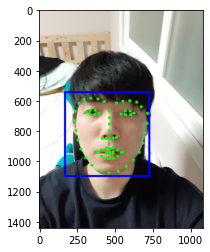

In [ ]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points): # list_points는 랜드마크 좌표의 튜플리스트
        cv2.circle(img_show, point, 10, (0, 255, 0), -1) # yellow
print(list_landmarks) #- list_points의 요소들은 (x,y) 튜플 쌍으로 이뤄짐.
print(len(list_landmarks))

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 얼굴 인식이 된 것을 확인 가능하다.

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    print (landmark[33]) # 가장 가운데 좌표 : 33
    
    x = landmark[33][0]
    y = landmark[33][1]
    
    w =  dlib_rect.width() + (landmark[33][0] - landmark[2][0])
    h =  dlib_rect.width() # landmark[43][0]-landmark[2][0]
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(463, 851)
(x,y) : (463,851)
(w,h) : (776,556)


- x,y 는 스티커의 좌표값, w, h 는 스티커의 너비와 높이

In [ ]:
sticker_path = '/content/drive/MyDrive/exploration/pic/cat-whiskers.png'
cat_sticker = cv2.imread(sticker_path) # 스티커를 불러온다.

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정
refined_x = x - w // 2  # left
refined_y = y - h //2    # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (75,573)


In [ ]:
if refined_y < 0:
    img_sticker = cat_sticker[-refined_y:]
    refined_y = 0
elif refined_x < 0:
    img_sticker = cat_sticker[-refined_x:]
    refined_x = 0
    

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(556, 774, 3)
(x,y) : (75,573)


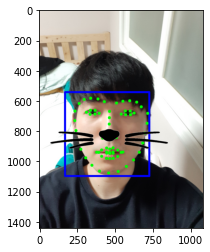

In [ ]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

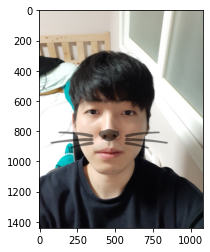

In [ ]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

굳굳굳